In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train1=pd.read_csv("C:/Users/admin/Desktop/sem 3/seema maam/sentiment_train.csv",delimiter="\t")

In [3]:
train1.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [5]:
train1[train1.sentiment==1][0:5]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [6]:
train1[train1.sentiment==0][0:5]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty ..."
3945,0,"The Da Vinci Code comes out tomorrow, which su..."
3946,0,i thought the da vinci code movie was really b...
3947,0,"God, Yahoo Games has this truly-awful looking ..."


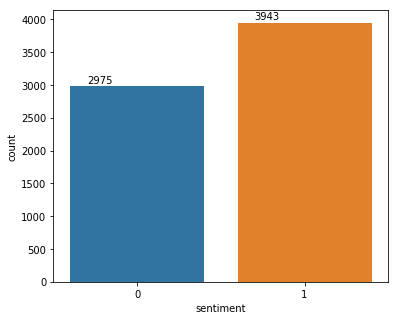

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(6,5))
#create count plot
ax=sn.countplot(x='sentiment',data=train1)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+50))

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
feature_vector=count_vector.fit(train1.text)
features=feature_vector.get_feature_names()
print("total number of features: ",len(features))

total number of features:  2132


In [9]:
#convert to df
train1_features=count_vector.transform(train1.text)
type(train1_features)

scipy.sparse.csr.csr_matrix

In [10]:
train1_features.shape

(6918, 2132)

In [11]:
train1_features.getnnz()

65398

In [12]:
print("Density of matrix: ",train1_features.getnnz()*100/(train1_features.shape[0]*train1_features.shape[1]))

Density of matrix:  0.4434010415225908


In [13]:
#converting matrix to df
train1_df=pd.DataFrame(train1_features.todense())
#setting column names to feature
train1_df.columns=features

In [14]:
train1_df.iloc[0:1,150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0


In [16]:
feature_counts=np.sum(train1_features.toarray(),axis=0)
feature_counts_df=pd.DataFrame(dict(features=features,counts=feature_counts))

In [17]:
len(feature_counts_df[feature_counts_df.counts==1])

1228

In [18]:
count_vector=CountVectorizer(max_features=1000)
feature_vector=count_vector.fit(train1.text)
features=feature_vector.get_feature_names()
train1_features=count_vector.transform(train1.text)
feature_counts=np.sum(train1_features.toarray(),axis=0)
feature_counts_df=pd.DataFrame(dict(features=features,counts=feature_counts))

In [23]:
feature_counts_df.sort_values('counts',ascending=False)[0:15]

,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


In [25]:
from sklearn.feature_extraction import text
my_stop_words=text.ENGLISH_STOP_WORDS
print("few stop words: ",list(my_stop_words)[0:10])

few stop words:  ['mill', 'can', 'move', 'i', 'in', 'too', 'who', 'there', 'here', 'an']


In [26]:
my_stop_words=text.ENGLISH_STOP_WORDS.union(['harry','potter','code','vinci','da','mountain'])

In [27]:
count_vector=CountVectorizer(stop_words=my_stop_words,max_features=1000)
feature_vector=count_vector.fit(train1.text)
features=feature_vector.get_feature_names()
train1_features=count_vector.transform(train1.text)
feature_counts_df.sort_values('counts',ascending=False)[0:15]

,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


In [28]:
from nltk.stem.snowball import PorterStemmer
stemmer=PorterStemmer()
analyzer=CountVectorizer().build_analyzer()

def stemmed_words(doc):
    stemmer_words=[stemmer.stem(w) for w in analyzer(doc)]
    non_stop_words=[word for word in stemmed_words if word not in my_stop_words]
    return non_stop_words

In [29]:
train1_df=pd.DataFrame(train1_features.todense())
train1_df.columns=features
train1_df['sentiment']=train1.sentiment

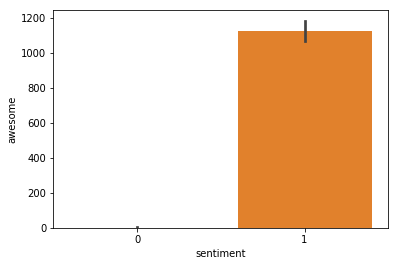

In [30]:
sn.barplot(x='sentiment',y='awesome',data=train1_df,estimator=sum);